Model Traning

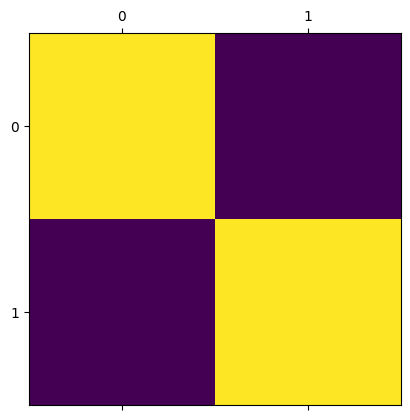

                           TransactionAmount  PreviousTransactionAmount
TransactionAmount                   1.000000                   0.001953
PreviousTransactionAmount           0.001953                   1.000000
K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.66      0.56      0.61     27889
           1       0.62      0.71      0.66     28111

    accuracy                           0.64     56000
   macro avg       0.64      0.64      0.63     56000
weighted avg       0.64      0.64      0.63     56000

Confusion Matrix
[[15665 12224]
 [ 8172 19939]]
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.50      0.60      0.54     27889
           1       0.50      0.40      0.44     28111

    accuracy                           0.50     56000
   macro avg       0.50      0.50      0.49     56000
weighted avg       0.50      0.50      0.49     56000

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Load dataset
file_path = 'credit_card_fraud_dataset.csv' #### ----->>> use the file where fraudlable is presnet(imp)
data = pd.read_csv(file_path)

import matplotlib.pyplot as plt

plt.matshow(data[['TransactionAmount', 'PreviousTransactionAmount']].corr())
plt.show()
print(data[['TransactionAmount', 'PreviousTransactionAmount']].corr())

# Data Preprocessing
# Convert categorical variables to numeric
label_encoders = {}
for column in ['MerchantCategory', 'TransactionLocation', 'CardType', 'DeviceType', 'TransactionChannel']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature Scaling
scaler = StandardScaler()
data[['TransactionAmount', 'PreviousTransactionAmount']] = scaler.fit_transform(
    data[['TransactionAmount', 'PreviousTransactionAmount']])

# Handling class imbalance using SMOTE
X = data[['TransactionAmount', 'PreviousTransactionAmount']]
y = data['FraudLabel']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Model Evaluation
print("K-Nearest Neighbors Classification Report")
print(classification_report(y_test, knn_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, knn_pred))

print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, lr_pred))



Preditction 

In [6]:
# Load dataset
file_path = 'credit_card_fraud_dataset_test.csv' ####----->>> using the file other file (imp)
data_1 = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Data Preprocessing
# Convert categorical variables to numeric
label_encoders = {}
for column in ['MerchantCategory', 'TransactionLocation', 'CardType', 'DeviceType', 'TransactionChannel']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Feature Scaling
scaler = StandardScaler()
data[['TransactionAmount', 'PreviousTransactionAmount']] = scaler.fit_transform(
    data[['TransactionAmount', 'PreviousTransactionAmount']])

# Handling class imbalance using SMOTE
X = data[['TransactionAmount', 'PreviousTransactionAmount']]
# y = data['FraudLabel']
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training
# K-Nearest Neighbors
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X)
knn_pred = knn.predict(X)

# Logistic Regression
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# lr_pred = lr.predict(X_test)

# # Model Evaluation
# print("K-Nearest Neighbors Classification Report")
# print(classification_report(y_test, knn_pred))
# print("Confusion Matrix")
# print(confusion_matrix(y_test, knn_pred))

# print("Logistic Regression Classification Report")
# print(classification_report(y_test, lr_pred))
# print("Confusion Matrix")
# print(confusion_matrix(y_test, lr_pred))

final = data_1.join(pd.DataFrame(knn_pred,columns=['Prediction']))

In [7]:
##predicted data file
final.to_csv('Creditcard_fraud_predictions.csv')